In [392]:
import pandas as pd
import plotly.express as px
import sys
import os
import re
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud
import numpy as np
import json




In [30]:
df = pd.read_csv(os.path.abspath(os.path.join('../'))+"/data/cleaned_tweet_data.csv")

### Display some of the data

In [31]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN


In [32]:
df.columns


Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16367 entries, 0 to 16366
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16367 non-null  object 
 1   source              16367 non-null  object 
 2   original_text       16367 non-null  object 
 3   polarity            14515 non-null  float64
 4   subjectivity        16367 non-null  float64
 5   lang                16367 non-null  object 
 6   favorite_count      14515 non-null  float64
 7   retweet_count       14515 non-null  float64
 8   original_author     16367 non-null  object 
 9   followers_count     16367 non-null  int64  
 10  friends_count       16367 non-null  int64  
 11  possibly_sensitive  6168 non-null   object 
 12  hashtags            16367 non-null  object 
 13  user_mentions       16367 non-null  object 
 14  place               10664 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.9+

In [34]:
df.describe()


,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,14515.000000,16367.000000,1.451500e+04,14515.000000,1.636700e+04,1.636700e+04
mean,0.090043,0.314242,3.359129e+03,656.043817,5.361675e+04,5.361675e+04
std,0.279109,0.316608,3.523459e+04,7508.335845,4.329542e+05,4.329542e+05
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000,1.120000e+02,1.120000e+02
50%,0.000000,0.288889,0.000000e+00,0.000000,5.430000e+02,5.430000e+02
75%,0.200000,0.529461,1.005000e+02,28.000000,2.131000e+03,2.131000e+03
max,1.000000,1.000000,1.339072e+06,434379.000000,6.027402e+06,6.027402e+06


##### The data without deeper analysis shows that most of the tweets are neutral with less subjectivity.

In [347]:
import plotly.graph_objects as go

# import numpy as np
x0 = df["polarity"]
x1 = df["subjectivity"]

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='polarity', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-4.0,
        end=3.0,
        size=0.5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='subjectivity',
    xbins=dict(
        start=-3.0,
        end=4,
        size=0.5
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [355]:
corrMatrix = df[["polarity","subjectivity"]].corr()
fig = px.imshow(corrMatrix)
fig.show()

Most of the data is neutral and less subjective, It seems like there isn't much of a correlation between polarity and subjectivity.

In [398]:
# df.sort_values(by=['col1`'])
df_authors = df.sort_values(by=["followers_count","friends_count","retweet_count","favorite_count"],ascending=False)[["original_author","polarity","subjectivity","followers_count","friends_count","retweet_count","favorite_count"]]
df_authors.describe()

,polarity,subjectivity,followers_count,friends_count,retweet_count,favorite_count
count,14515.000000,16367.000000,1.636700e+04,1.636700e+04,14515.000000,1.451500e+04
mean,0.090043,0.314242,5.361675e+04,5.361675e+04,656.043817,3.359129e+03
std,0.279109,0.316608,4.329542e+05,4.329542e+05,7508.335845,3.523459e+04
min,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,1.120000e+02,1.120000e+02,0.000000,0.000000e+00
50%,0.000000,0.288889,5.430000e+02,5.430000e+02,0.000000,0.000000e+00
75%,0.200000,0.529461,2.131000e+03,2.131000e+03,28.000000,1.005000e+02
max,1.000000,1.000000,6.027402e+06,6.027402e+06,434379.000000,1.339072e+06


In [401]:
df_authors_filtered =df_authors.groupby(by='original_author').agg({'subjectivity':np.mean,'polarity':np.mean,"followers_count":sum,"friends_count":sum,"retweet_count":sum,"favorite_count":sum}).reset_index().head(50)
df_authors_filtered

,original_author,subjectivity,polarity,followers_count,friends_count,retweet_count,favorite_count
0,0D8e6XoW2Ji9vQt,0.276316,-0.038235,2128,2128,5210.0,5743.0
1,17_shubhamverma,0.233229,0.088360,84,84,221701.0,1217893.0
2,1DrSCARECROW,0.200934,0.060679,507850,507850,15103.0,137224.0
3,2_ragni,0.000000,0.000000,18,18,458.0,4187.0
4,36Kr,0.326489,0.086111,463080,463080,0.0,0.0
5,3osVyJVKJ0cOtVu,0.498920,0.335556,600,600,374.0,1281.0
6,4_localpolice,0.275187,0.021625,6636,6636,102521.0,413218.0
7,4got1en_6ol,0.164157,0.033009,512,512,1334.0,19351.0
8,64013fa7a038486,0.480322,0.083225,225,225,23001.0,30996.0
9,ASBrokerage,0.382588,0.177906,14600,14600,0.0,0.0


In [ ]:
d

In [404]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_authors_filtered["original_author"].tolist(),
    y=df_authors_filtered["polarity"].tolist(),
    name='polarity',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df_authors_filtered["original_author"].tolist(),
    y=df_authors_filtered["subjectivity"].tolist(),
    name='Subjectivity',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

#### Convert to the right data types


In [161]:
df_copy['created_at'] =  pd.to_datetime(df_copy['created_at'])
df_copy.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,cleaned_text
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,The 10-year yield is telling us that there's a...
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,"German 10y mortgage rate went from 0,8% to 2,5..."
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN,When?
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,The 30-year mortgage rate in the US rises to 5...
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN,Rates rise until something breaks is anything...


### Clean original text column

In [332]:
# scripts to clean our tweet text
def remove_mentions(text):
    text_splited = text.split(" ")
    text_splited[:] = [word for word in text_splited if not word.startswith("@")]
    text = (" ").join(text_splited)
    return text

def remove_hashtags(text):
    text_splited = text.split(" ")
    text_splited[:] = [word for word in text_splited if not word.startswith("#")]
    text = (" ").join(text_splited)
    return text

def remove_unfinished_letters(text):
    text_splited = text.split(" ")
    text_splited[:] = [word for word in text_splited if not word.endswith("…") or not word.endswith("...")]
    text = (" ").join(text_splited)
    return text

def remove_RT(text):
    text_splited = text.split(" ")
    text_splited[:] = [word for word in text_splited if word != "RT"]
    text = (" ").join(text_splited)
    return text


In [342]:
df_copy = df.copy()
df_copy["cleaned_text"] = df_copy["original_text"].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: remove_mentions(x) )
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: remove_hashtags(x) )
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: x.replace('\n',''))
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: remove_unfinished_letters(x))
df_copy["cleaned_text"] = df_copy["cleaned_text"].apply(lambda x: remove_RT(x))

df_copy.loc[10000,"original_text"],df_copy.loc[10000,"cleaned_text"]

('RT @ArifHabibLtd: Other businesses that continued to report higher production in the ongoing fiscal year in Pakistan included large scale m…',
 'Other businesses that continued to report higher production in the ongoing fiscal year in Pakistan included large scale m')

#### Clean hashtags and analyze them


In [335]:
hashtags = df_copy.loc[df_copy.hashtags.apply(
                           lambda x: x != '[]'
                       ),['hashtags']].reset_index()
hashtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5251 non-null   int64 
 1   hashtags  5251 non-null   object
dtypes: int64(1), object(1)
memory usage: 82.2+ KB


In [337]:
import ast
def get_hashtags(text):
    hashtags = []
    hash_list = ast.literal_eval(text)
    for hash_tag in hash_list:
        hashtags.append(hash_tag["text"])
    return hashtags
    
hashtags["values"] = hashtags["hashtags"].apply(lambda x: get_hashtags(x))
hashtags

In [339]:
hash_tag_pool = []
for hash_tag in hashtags["values"].tolist():
    hash_tag_pool.extend(hash_tag)

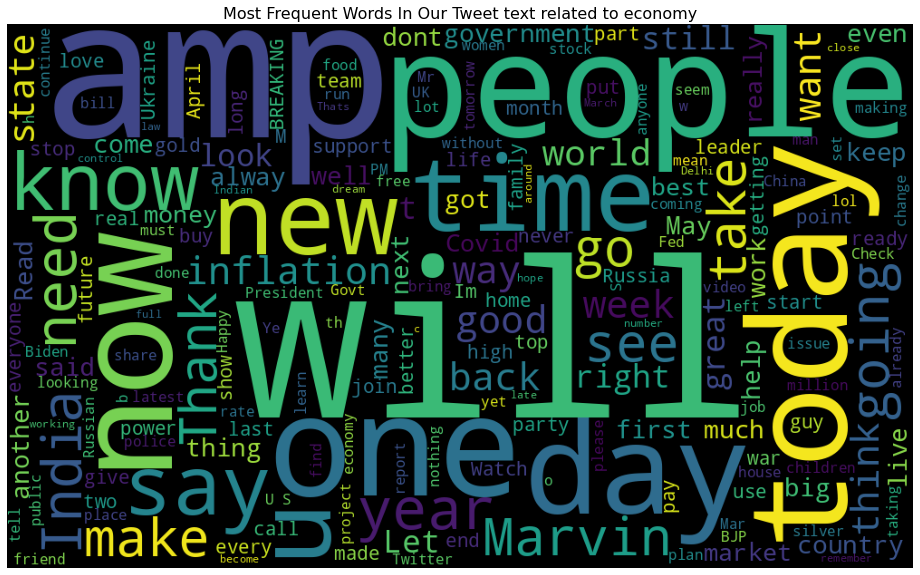

In [341]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(df_copy.cleaned_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweet text related to economy',fontsize=16)
plt.show()

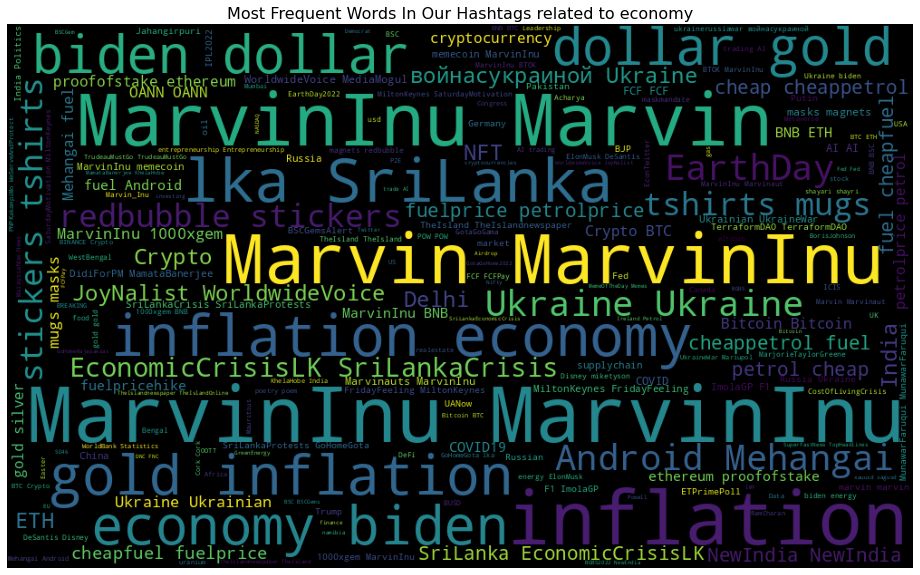

In [340]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(hash_tag_pool)))
plt.axis('off')
plt.title('Most Frequent Words In Our Hashtags related to economy',fontsize=16)
plt.show()

In [21]:
# df_copy[df_copy["original_author"].apply(lambda x: "marvin" in x)]